##### Figure out which variables have a direct and clear impact on employee retention (whether they leave the company or continue to work)
- Plot a bar chart showing impact of employee salaries on retention.
- Plot bar charts showing correlation between department and employee retention
- Build linear regression model using variables that were narrowed down in step 1
- Measure the accuracy of the model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('HR_comma_sep.csv')

df.head(10)

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


0.7813333333333333


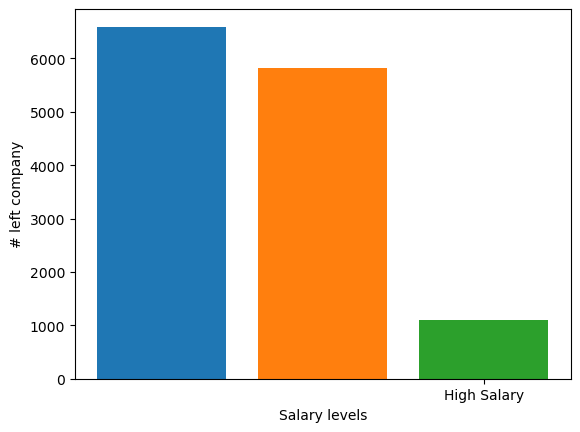

In [151]:
## one hot encode the salaries

dummy_values = pd.get_dummies(df['salary'])

formatted_table = pd.concat([df, dummy_values], axis='columns')

formatted_table = formatted_table.drop(columns=['salary'])

train_x, test_x, train_y, test_y = train_test_split(formatted_table[['high', 'medium', 'low']], formatted_table['left'], test_size=0.1)

resultant_logistic = LogisticRegression()

resultant_logistic.fit(train_x[['high', 'medium', 'low']], train_y)

%matplotlib inline

plt.bar(0, train_x['low'][train_x['low'] != 0].size, tick_label='Low Salary')
plt.bar(1, train_x['medium'][train_x['medium'] != 0].size, tick_label='Medium Salary')
plt.bar(2, train_x['high'][train_x['high'] != 0].size, tick_label='High Salary')
plt.xlabel("Salary levels")
plt.ylabel("# left company")


print(resultant_logistic.score(test_x[['high', 'medium', 'low']], test_y))